In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("telechurn500.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
(df.customerID.unique()).size

500

In [39]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
X=df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X[0:5]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [41]:
y=df[['Churn']]

In [42]:
garr=df.gender.unique()
garr

array(['Female', 'Male'], dtype=object)

In [43]:
ptnr=df.Partner.unique()
ptnr

array(['Yes', 'No'], dtype=object)

In [44]:
dep=df.Dependents.unique()
dep

array(['No', 'Yes'], dtype=object)

In [45]:
psar=df.PhoneService.unique()
psar

array(['No', 'Yes'], dtype=object)

In [46]:
mul=df.MultipleLines.unique()
mul

array(['No phone service', 'No', 'Yes'], dtype=object)

In [47]:
iser=df.InternetService.unique()
iser

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [48]:
osec=df.OnlineSecurity.unique()
osec

array(['No', 'Yes', 'No internet service'], dtype=object)

In [49]:
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())

['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [50]:
oba=df.OnlineBackup.unique()
oba

array(['Yes', 'No', 'No internet service'], dtype=object)

In [51]:
dpr=df.DeviceProtection.unique()
dpr

array(['No', 'Yes', 'No internet service'], dtype=object)

In [52]:
print(df.Contract.unique())
print(df.PaperlessBilling.unique())
print(df.PaymentMethod.unique())

['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [53]:
cnt=df.Contract.unique()
pbil=df.PaperlessBilling.unique()
pmet=df.PaymentMethod.unique()

In [54]:
from sklearn import preprocessing
le_garr= preprocessing.LabelEncoder()
le_garr.fit(garr)
X[['gender']] = le_garr.transform(X[['gender']]) 

le_dep= preprocessing.LabelEncoder()
le_dep.fit(dep)
X[['Dependents']] = le_dep.transform(X[['Dependents']]) 


le_psar= preprocessing.LabelEncoder()
le_psar.fit(psar)
X[['PhoneService']] = le_psar.transform(X[['PhoneService']]) 

le_mul= preprocessing.LabelEncoder()
le_mul.fit(mul)
X[['MultipleLines']] = le_mul.transform(X[['MultipleLines']]) 

le_iser= preprocessing.LabelEncoder()
le_iser.fit(iser)
X[['InternetService']] = le_iser.transform(X[['InternetService']]) 

le_osec= preprocessing.LabelEncoder()
le_osec.fit(osec)
X[['OnlineSecurity']] = le_osec.transform(X[['OnlineSecurity']]) 

le_oba= preprocessing.LabelEncoder()
le_oba.fit(oba)
X[['OnlineBackup']] = le_oba.transform(X[['OnlineBackup']]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X[['DeviceProtection']] = le_dpr.transform(X[['DeviceProtection']]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X[['TechSupport']] = le_dpr.transform(X[['TechSupport']]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X[['StreamingTV']] = le_dpr.transform(X[['StreamingTV']]) 

le_dpr= preprocessing.LabelEncoder()
le_dpr.fit(dpr)
X[['StreamingMovies']] = le_dpr.transform(X[['StreamingMovies']]) 



C:\Users\Prerana\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prerana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Prerana\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  se

In [56]:
le_ptnr= preprocessing.LabelEncoder()
le_ptnr.fit(X.Partner.unique())
X[['Partner']] = le_ptnr.transform(X[['Partner']]) 

C:\Users\Prerana\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prerana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prerana\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [57]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65


In [58]:
le_cnt= preprocessing.LabelEncoder()
le_cnt.fit(cnt)
X[['Contract']] = le_cnt.transform(X[['Contract']]) 

le_pbil= preprocessing.LabelEncoder()
le_pbil.fit(pbil)
X[['PaperlessBilling']] = le_pbil.transform(X[['PaperlessBilling']]) 

le_pmet= preprocessing.LabelEncoder()
le_pmet.fit(pmet)
X[['PaymentMethod']] = le_pmet.transform(X[['PaymentMethod']]) 

C:\Users\Prerana\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prerana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prerana\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [59]:
le_cusid= preprocessing.LabelEncoder()
le_cusid.fit(X.customerID.unique())
X[['customerID']] = le_cusid.transform(X[['customerID']]) 


C:\Users\Prerana\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Prerana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prerana\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [60]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,390,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,272,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,171,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,402,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,465,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [61]:
X.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.484000,0.168000,0.484000,0.312000,31.454000,0.890000,0.902000,0.838000,0.764000,0.960000,0.876000,0.784000,0.976000,1.032000,0.668000,0.602000,1.554000,65.973900,2220.367940
std,144.481833,0.500244,0.374241,0.500244,0.463774,24.415489,0.313203,0.939234,0.721663,0.868223,0.898897,0.891186,0.873424,0.899468,0.899218,0.831359,0.489976,1.086944,29.554493,2197.608532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.950000,19.150000
25%,124.750000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.225000,421.700000
50%,249.500000,0.000000,0.000000,0.000000,0.000000,27.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,71.525000,1363.875000
75%,374.250000,1.000000,0.000000,1.000000,1.000000,52.250000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.937500,3569.837500
max,499.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,116.050000,8468.200000


In [62]:
y.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [63]:
#now all the attributes are ready to fed in the decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [66]:
print("train set: ",X_trainset.shape,y_trainset.shape)
print("test set: ",X_testset.shape,y_testset.shape)

train set:  (350, 20) (350, 1)
test set:  (150, 20) (150, 1)


In [146]:
cusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
cusTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [147]:
cusTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [148]:
predTree = cusTree.predict(X_testset)

In [149]:
print (predTree [0:5])
print (y_testset [0:5])

['Yes' 'No' 'No' 'No' 'Yes']
    Churn
130    No
291    No
37     No
239    No
191   Yes


In [150]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7866666666666666


In [151]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

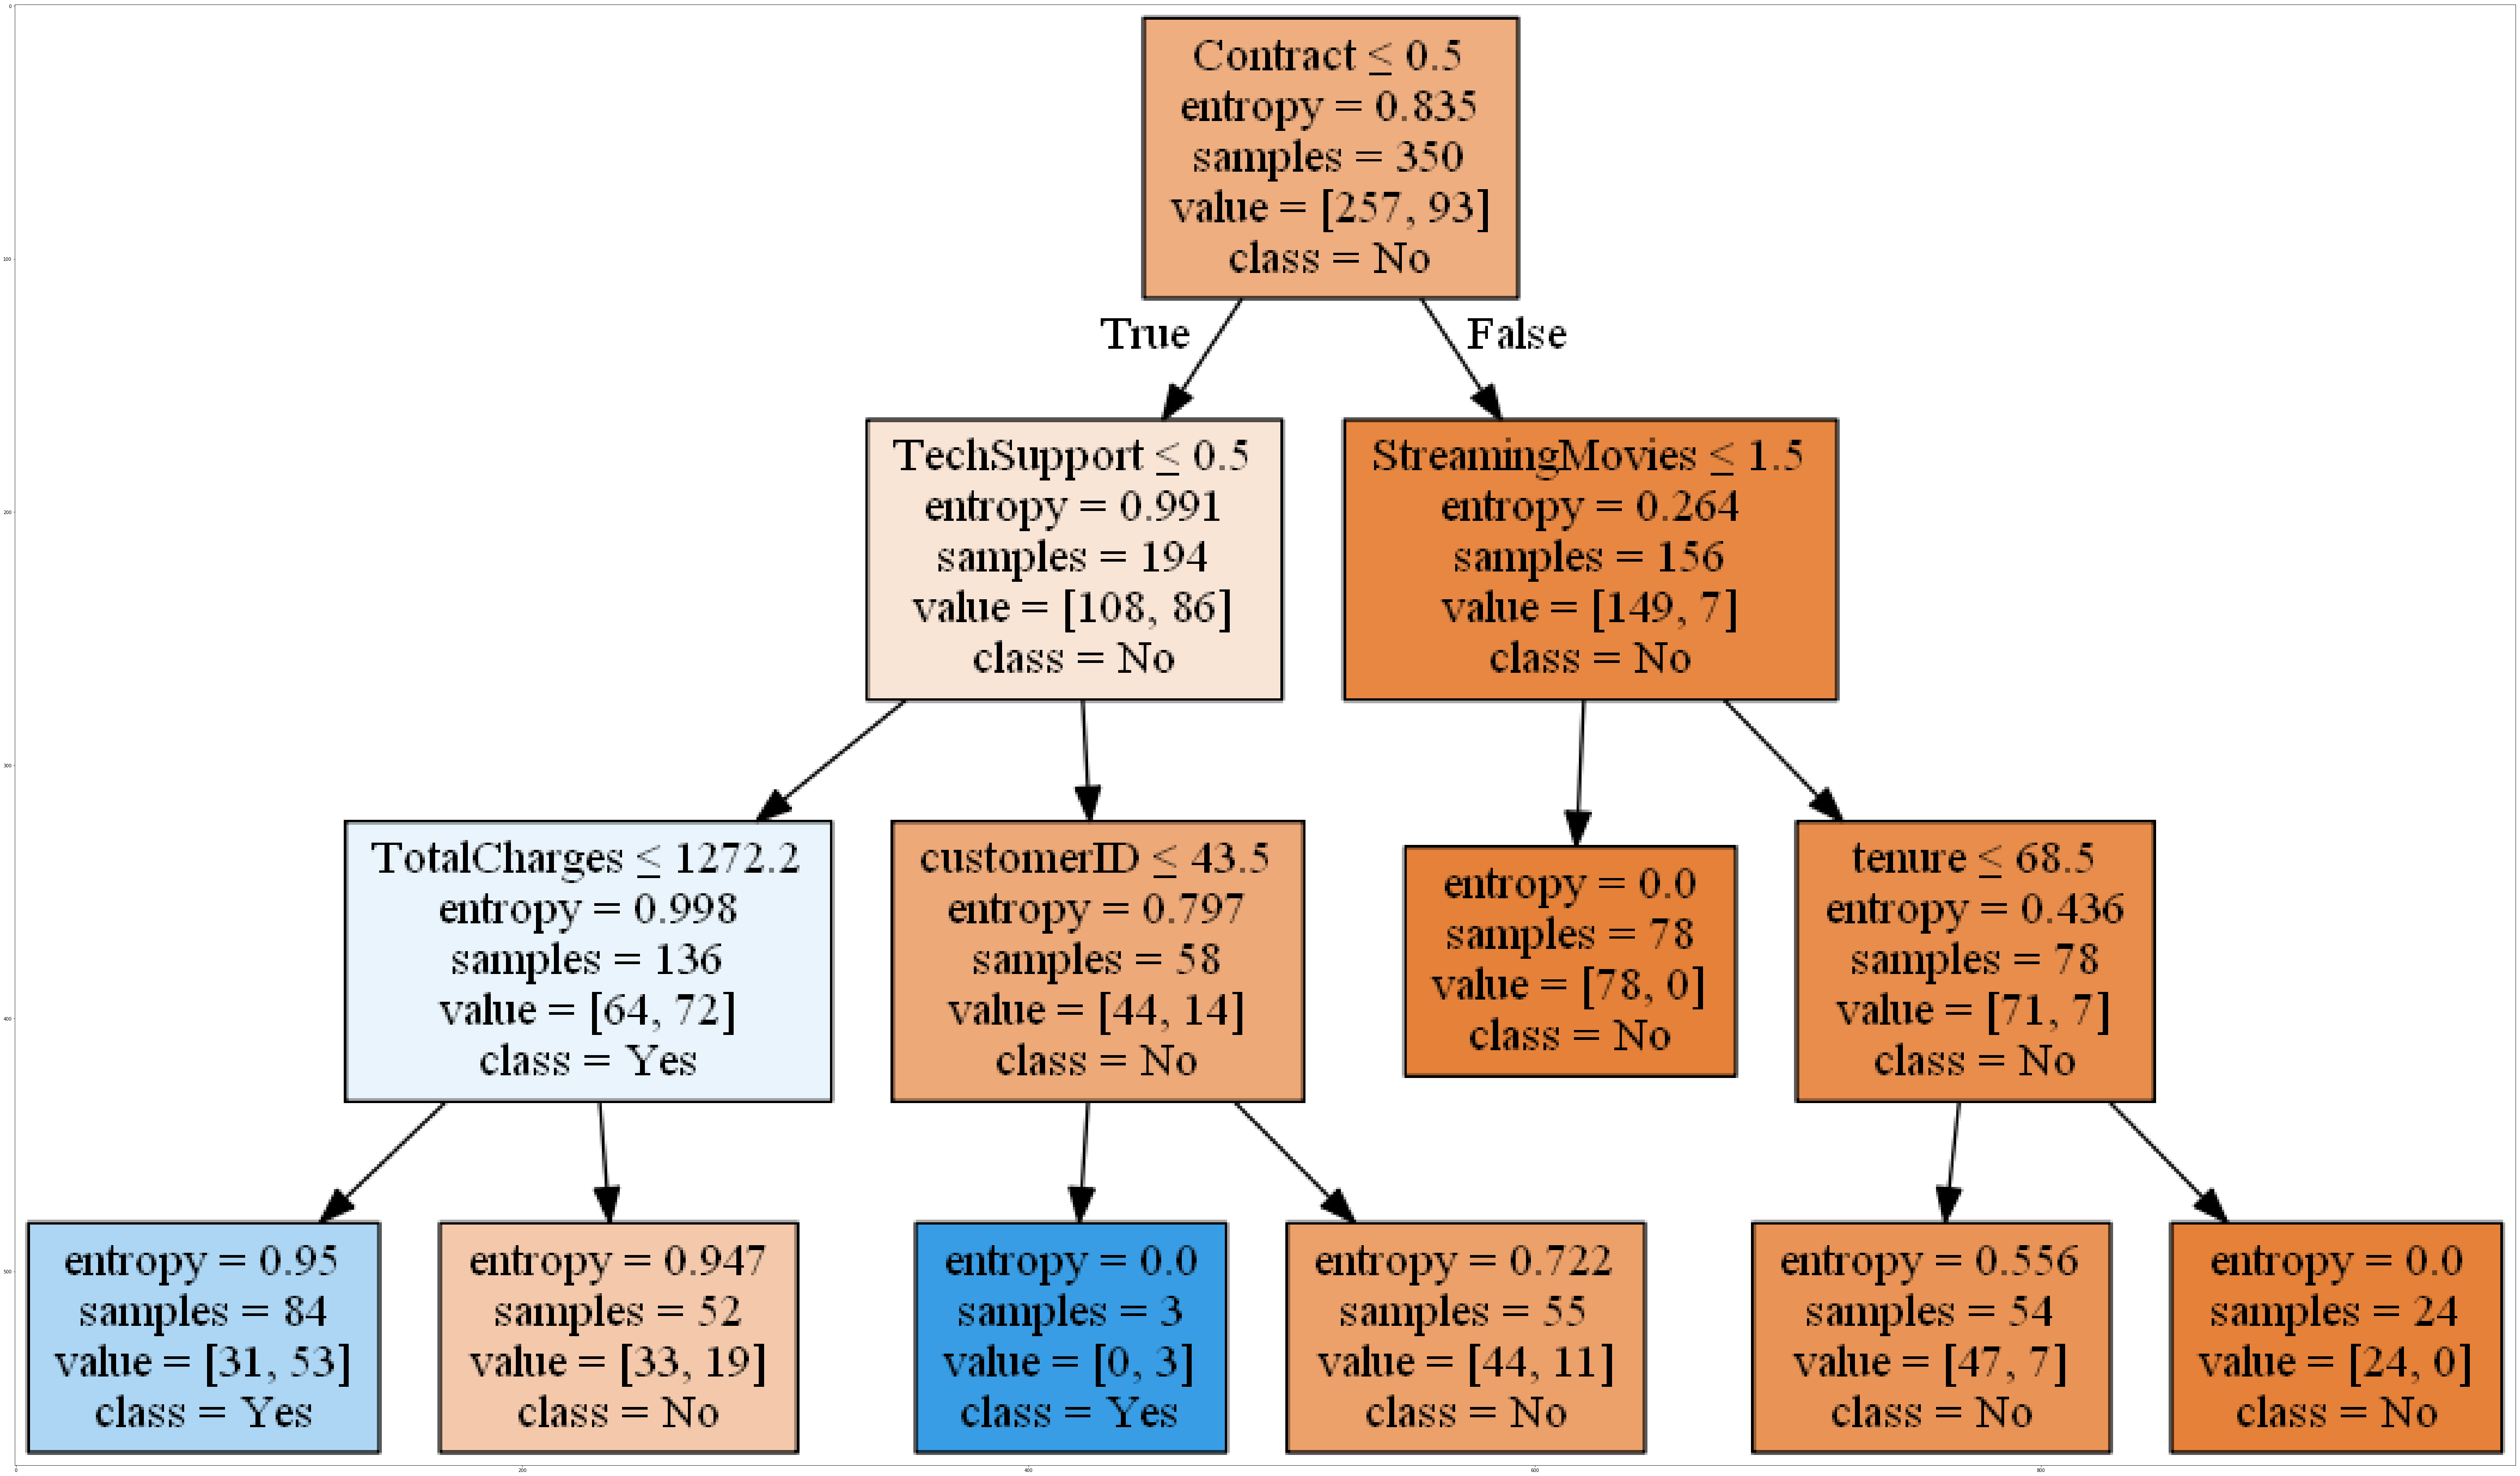

In [152]:
dot_data = StringIO()
filename = "custree3.png"
featureNames = df.columns[0:20]
targetNames = df["Churn"].unique().tolist()
out=tree.export_graphviz(cusTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [153]:
df2=pd.read_csv("accuracies.csv")
df2.head()

,max_depth,accuracy
0,3,0.786667
1,4,0.760000
2,5,0.733333
3,6,0.720000


Text(0,0.5,'Accuracy')

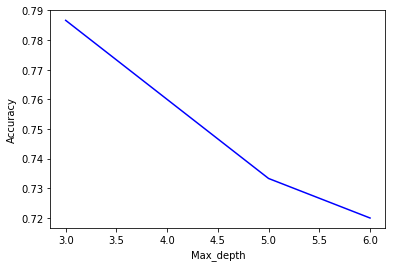

In [155]:
xval=df2[['max_depth']]
yval=df2[['accuracy']]
plt.plot(xval,yval,color="blue")
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')

In [156]:
#max accuracy at depth=3